In [44]:
## Importing essential libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing Dataset and EDA

In [101]:
## Importing Datasets
df = pd.read_csv(r"drug200.csv")

In [102]:
df.shape

(200, 6)

In [106]:
## To see top 5 rows of dataset
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [122]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [48]:
## To see the dataset information i.e column names,type of column, how many non-null values are present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Missing Values

In [109]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [50]:
## Now for numeric columns we can compute its description
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [111]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

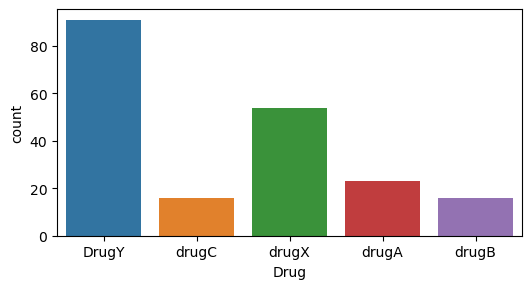

In [112]:
# Let's check the Target_feature, and as we see there is imblance data issue we have to solve first before fitting model on this data we have ; b
plt.figure(figsize = (6,3), dpi = 100)
sns.countplot(data = df , x = 'Drug')

In [113]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

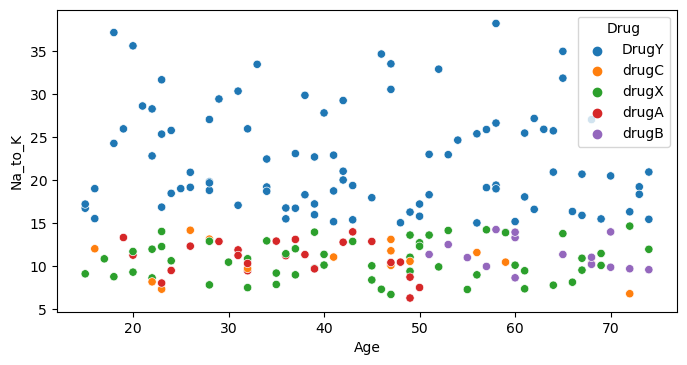

In [115]:
plt.figure(figsize = (8,4),dpi = 100)
sns.scatterplot(data = df , x = 'Age' , y = 'Na_to_K',hue = 'Drug')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

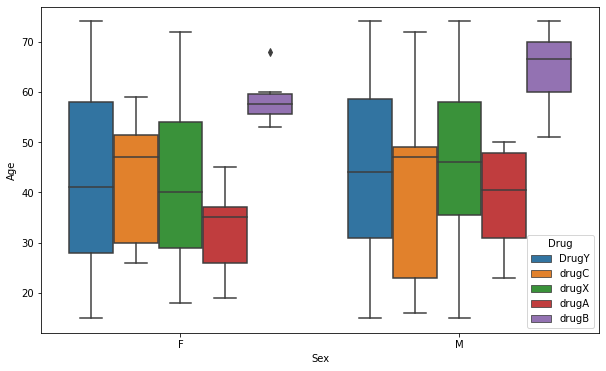

In [121]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df , x = 'Sex' , y = 'Age',hue = 'Drug')

In [55]:
drug_label = df['Drug'].value_counts().index
drug_label

Index(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], dtype='object')

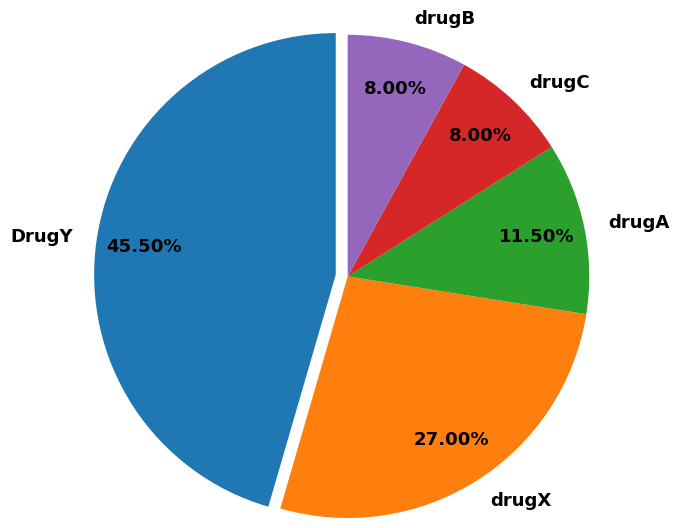

In [56]:
plt.figure(figsize = (8,4),dpi = 100)
plt.pie(drug_count , labels = drug_label , autopct = '%1.2f%%',textprops={'fontweight':'bold','size' :13},explode = [0.1,0,0,0,0],startangle= 90,
       pctdistance = 0.8 , radius = 2)
plt.show()

<AxesSubplot:>

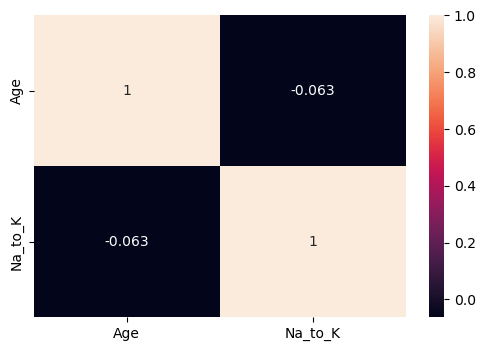

In [57]:
plt.figure(figsize = (6,4),dpi = 100)
sns.heatmap(df.corr(),annot = True)

## Convert Categorical column to Numeric

In [123]:
## here we convert gender column categorical to numerical
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.BP = le.fit_transform(df.BP)
df.Cholesterol = le.fit_transform(df.Cholesterol)
df.Drug = le.fit_transform(df.Drug)

In [125]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [133]:
min(df.Na_to_K)

6.269

In [132]:
max(df.Age)

74

## Data Split

In [126]:
from sklearn.model_selection import train_test_split

In [174]:
x=df.drop('Drug',axis=1)
y=df['Drug']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [175]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [176]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (160, 5)
y_train (160,)
x_test (40, 5)
y_test (40,)


## KNN Classifier

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Here we import cofusion_matrix
from sklearn.metrics import confusion_matrix

In [182]:
acc=[]
k=[]
error=[]
for i in range(1,10):
    k.append(i)
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    tab_1=confusion_matrix(y_pred,y_test)
    acc.append(tab_1.diagonal().sum()/tab_1.sum())
    error.append(1-tab_1.diagonal().sum()/tab_1.sum())

In [183]:
knn = pd.DataFrame({"k":k,"Accuracy":acc,'Error':error})
knn

,k,Accuracy,Error
0,1,0.850,0.150
1,2,0.800,0.200
2,3,0.875,0.125
3,4,0.750,0.250
4,5,0.750,0.250
5,6,0.700,0.300
6,7,0.700,0.300
7,8,0.675,0.325
8,9,0.650,0.350


Text(0, 0.5, 'error')

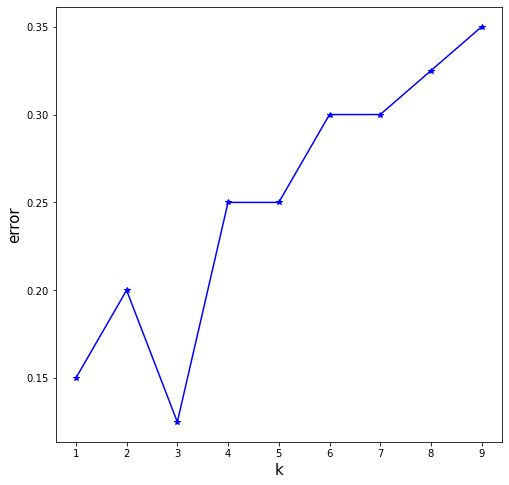

In [184]:
plt.figure(figsize=(8,8))
plt.plot(k,error,color="b",marker="*")
plt.xlabel('k',size =15)
plt.ylabel('error',size =15)

Here the error is minimum at 3, so we will take k value as 3.

In [215]:
model=KNeighborsClassifier(3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [196]:
## Here command to find Accuracy.
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred , y_test)
Accuracy

0.875

# Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [198]:
## Confusion matrix is used to see performance of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0  0  1]
 [ 0  4  0  0  0]
 [ 2  0  2  0  0]
 [ 2  0  0  2  0]
 [ 2  0  0  0 12]]


In [199]:
## Here command to find Accuracy.
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred , y_test)
Accuracy

0.825

# SVM

In [212]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [213]:
## Confusion matrix is used to see performance of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0  0  0]
 [ 0  4  0  0  0]
 [ 1  2  1  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 13]]


In [214]:
## Here command to find Accuracy.
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred , y_test)
Accuracy

0.9